In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3 months of NYC Yellow Taxi data
url1 = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
url2 = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet"
url3 = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet"

df1 = pd.read_parquet(url1, engine="fastparquet")
df2 = pd.read_parquet(url2, engine="fastparquet")
df3 = pd.read_parquet(url3, engine="fastparquet")

df = pd.concat([df1, df2, df3], ignore_index=True)

# Basic exploration
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:")
df.head()

Shape: (9384487, 20)

Columns:
 ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee']

Data types:
 VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                    float64
DOLocationID                    float64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2.0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161.0,141.0,2.0,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,NaN
1,2.0,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43.0,237.0,1.0,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,NaN
2,2.0,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48.0,238.0,1.0,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,NaN
3,1.0,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138.0,7.0,1.0,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,NaN
4,2.0,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107.0,79.0,1.0,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,NaN


# Initial observations:
- Passenger count is sometimes zero
- Dataset has airport_fee and Airport_fee duplicate columns
- For some reason I had error for loading parquet with pyarrow engine, so it was loaded via fastparquet engine

In [64]:
# ============================================================
# TASK A1 — Data Types & Attributes
# ============================================================

# Fix the duplicate airport_fee columns by merging them
df['airport_fee'] = df['airport_fee'].combine_first(df['Airport_fee'])
df.drop(columns=['Airport_fee'], inplace=True)

print("Columns after cleanup:", df.shape[1], "columns\n")

attribute_info = {
    'VendorID':                ('float64', 'Nominal',     'Identifies the taxi vendor (1 or 2). Numbers are just labels — no ordering or math makes sense.'),
    'tpep_pickup_datetime':    ('datetime','Continuous',  'A point in time — infinitely divisible, measured on a continuous scale.'),
    'tpep_dropoff_datetime':   ('datetime','Continuous',  'Same as pickup — a continuous time value.'),
    'passenger_count':         ('float64', 'Discrete',    'Count of passengers — whole numbers only (1, 2, 3...), no fractions.'),
    'trip_distance':           ('float64', 'Continuous',  'Miles traveled — can take any decimal value, measured on a continuous scale.'),
    'RatecodeID':              ('float64', 'Nominal',     'Rate category (1=Standard, 2=JFK, 3=Newark...). Numbers are labels, not quantities.'),
    'store_and_fwd_flag':      ('object',  'Nominal',     'Y/N flag — two unordered categories.'),
    'PULocationID':            ('float64', 'Nominal',     'Pickup zone ID — just a label for a geographic area, no numeric meaning.'),
    'DOLocationID':            ('float64', 'Nominal',     'Dropoff zone ID — same reasoning as PULocationID.'),
    'payment_type':            ('float64', 'Nominal',     'Payment method (1=Credit, 2=Cash...). Categories with no natural order.'),
    'fare_amount':             ('float64', 'Continuous',  'Dollar amount — can take any decimal value, true zero exists.'),
    'extra':                   ('float64', 'Continuous',  'Surcharge amount in dollars — continuous monetary value.'),
    'mta_tax':                 ('float64', 'Continuous',  'Fixed tax amount — continuous monetary value.'),
    'tip_amount':              ('float64', 'Continuous',  'Tip in dollars — continuous, includes $0 (no tip).'),
    'tolls_amount':            ('float64', 'Continuous',  'Toll fees — continuous monetary value.'),
    'improvement_surcharge':   ('float64', 'Continuous',  'Fixed surcharge — continuous monetary value.'),
    'total_amount':            ('float64', 'Continuous',  'Total fare in dollars — continuous, sum of all charges.'),
    'congestion_surcharge':    ('float64', 'Continuous',  'Added fee for congestion zones — continuous monetary value.'),
    'airport_fee':             ('float64', 'Continuous',  'Airport pickup/dropoff fee — continuous, 0 when not applicable.'),
}

print(f"{'Column':<26} {'Pandas Type':<12} {'ML Type':<12} {'Justification'}")
print("-" * 110)
for col, (dtype, ml_type, justification) in attribute_info.items():
    print(f"{col:<26} {dtype:<12} {ml_type:<12} {justification}")

Columns after cleanup: 19 columns

Column                     Pandas Type  ML Type      Justification
--------------------------------------------------------------------------------------------------------------
VendorID                   float64      Nominal      Identifies the taxi vendor (1 or 2). Numbers are just labels — no ordering or math makes sense.
tpep_pickup_datetime       datetime     Continuous   A point in time — infinitely divisible, measured on a continuous scale.
tpep_dropoff_datetime      datetime     Continuous   Same as pickup — a continuous time value.
passenger_count            float64      Discrete     Count of passengers — whole numbers only (1, 2, 3...), no fractions.
trip_distance              float64      Continuous   Miles traveled — can take any decimal value, measured on a continuous scale.
RatecodeID                 float64      Nominal      Rate category (1=Standard, 2=JFK, 3=Newark...). Numbers are labels, not quantities.
store_and_fwd_flag         ob

In [65]:
# ============================================================
# TASK A2 — Descriptive Statistics
# ============================================================

numeric_cols = ['passenger_count', 'trip_distance', 'fare_amount',
                'tip_amount', 'tolls_amount', 'total_amount']

df_num = df[numeric_cols].copy()

stats = pd.DataFrame()
stats['Mean'] = df_num.mean()
stats['Median'] = df_num.median()
stats['Mode'] = df_num.mode().iloc[0]
stats['Range'] = df_num.max() - df_num.min()
stats['Variance'] = df_num.var()
stats['Std Dev'] = df_num.std()
q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)
stats['IQR'] = q3 - q1
stats['Min'] = df_num.min()
stats['Max'] = df_num.max()

print("=" * 60)
print("A2: Descriptive Statistics")
print("=" * 60)
print(stats.round(4).to_string())

A2: Descriptive Statistics
                    Mean  Median  Mode      Range    Variance   Std Dev    IQR     Min        Max
passenger_count   1.3555    1.00   1.0       9.00      0.7928    0.8904   0.00    0.00       9.00
trip_distance     3.8743    1.79   0.0  335004.33  56056.5514  236.7626   2.27    0.00  335004.33
fare_amount      18.5179   12.80   8.6    3163.00    319.6816   17.8796  11.90 -959.90    2203.10
tip_amount        3.4194    2.80   0.0    1080.52     15.1559    3.8931   3.25  -96.22     984.30
tolls_amount      0.5339    0.00   0.0     270.29      4.2362    2.0582   0.00  -73.30     196.99
total_amount     27.2665   20.30  16.8    3191.05    498.4588   22.3262  13.54 -982.95    2208.10


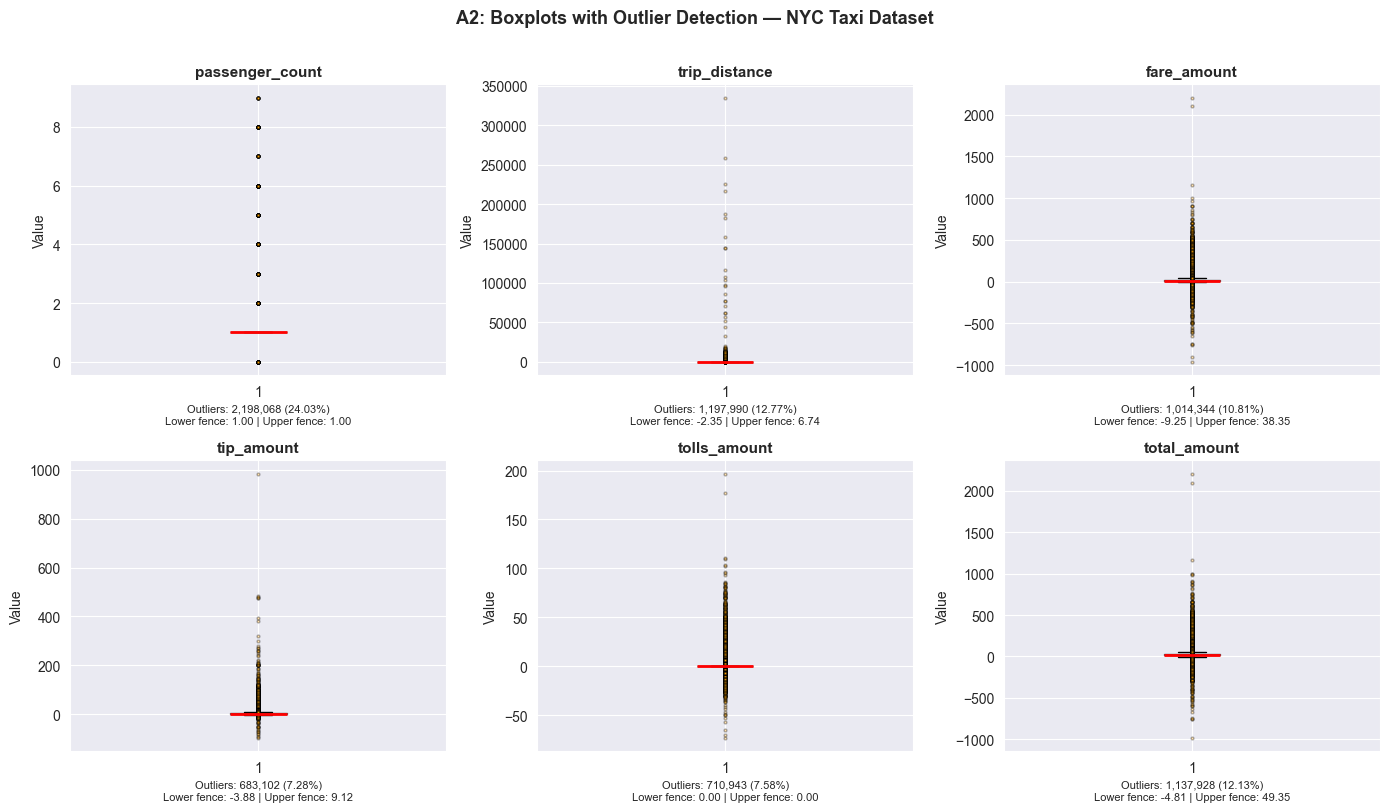

Caption: Boxplots for 6 key numeric features. Orange dots = suspected outliers beyond 1.5×IQR fences.


In [66]:
# --- Boxplot for outlier visualization ---
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]

    bp = ax.boxplot(df_num[col].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='#4C72B0', alpha=0.6),
                    medianprops=dict(color='red', linewidth=2),
                    flierprops=dict(marker='o', markerfacecolor='orange',
                                   markersize=2, alpha=0.3))

    q1_val = q1[col]
    q3_val = q3[col]
    iqr_val = stats.loc[col, 'IQR']
    lower = q1_val - 1.5 * iqr_val
    upper = q3_val + 1.5 * iqr_val

    outliers = df_num[col][(df_num[col] < lower) | (df_num[col] > upper)]
    n_outliers = len(outliers)
    pct = 100 * n_outliers / df_num[col].notna().sum()

    ax.set_title(f'{col}', fontsize=11, fontweight='bold')
    ax.set_xlabel(f'Outliers: {n_outliers:,} ({pct:.2f}%)\nLower fence: {lower:.2f} | Upper fence: {upper:.2f}',
                  fontsize=8)
    ax.set_ylabel('Value')

plt.suptitle('A2: Boxplots with Outlier Detection — NYC Taxi Dataset',
             fontsize=13, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()
print("Caption: Boxplots for 6 key numeric features. Orange dots = suspected outliers beyond 1.5×IQR fences.")

In [67]:
print("\nExtreme outlier examples (top 5 highest values per column):")
print("-" * 60)
for col in numeric_cols:
    iqr_val = stats.loc[col, 'IQR']
    upper = q3[col] + 1.5 * iqr_val
    lower = q1[col] - 1.5 * iqr_val
    outliers = df_num[col][(df_num[col] < lower) | (df_num[col] > upper)]
    top5 = outliers.abs().nlargest(5).values
    print(f"{col:<20} upper fence={upper:.2f} | top 5 extreme values: {top5}")


Extreme outlier examples (top 5 highest values per column):
------------------------------------------------------------
passenger_count      upper fence=1.00 | top 5 extreme values: [9. 9. 9. 9. 9.]
trip_distance        upper fence=6.74 | top 5 extreme values: [335004.33 258928.15 225987.37 216986.96 187872.33]
fare_amount          upper fence=38.35 | top 5 extreme values: [2203.1 2100.  1160.1  999.   959.9]
tip_amount           upper fence=9.12 | top 5 extreme values: [984.3 482.9 480.1 477.5 474.4]
tolls_amount         upper fence=0.00 | top 5 extreme values: [196.99 177.   111.   109.9  103.45]
total_amount         upper fence=49.35 | top 5 extreme values: [2208.1 2100.  1169.4 1000.  1000. ]


# Observations:
```trip_distance``` max is 335,004 miles — that's physically impossible. Clear data error.

```fare_amount``` and ```total_amount``` have negative values (min = -959.90, -982.95) — these are refund/correction entries, not real trips.

```passenger_count``` upper fence = 1.00, meaning even 2 passengers is technically an outlier — that just tells that solo rides dominate so heavily looking at the IQR = 0.

```tip_amount``` mode = 0 confirms most cash payers don't record tips, and trip_distance mode = 0 means many rows have no recorded distance.

In [68]:
# ============================================================
# TASK A3 — Handling Missing Data
# ============================================================

# Step 1: Check existing missing values
print("=== Existing Missing Values ===")
missing = df[numeric_cols].isnull().sum()
missing_pct = 100 * missing / len(df)
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct.round(3)})
print(missing_df[missing_df['Missing Count'] > 0])

=== Existing Missing Values ===
                 Missing Count  Missing %
passenger_count         236179      2.517


In [69]:
# Step 2: Work on a clean copy with 2 columns that have real NaNs
# Also artificially add 5% more NaNs to fare_amount (which has none)
# so we can demonstrate all 3 imputation methods fairly

work_cols = ['passenger_count', 'trip_distance', 'fare_amount']
df_work = df[work_cols].copy()

np.random.seed(42) # the answer to life, the universe, and everything;).
n_total = len(df_work)
n_missing = int(0.05 * n_total)
missing_idx = np.random.choice(df_work.index, size=n_missing, replace=False)
df_work.loc[missing_idx, 'fare_amount'] = np.nan

print("=== Missing values in working subset ===")
print(df_work.isnull().sum())
print()

# Save stats BEFORE imputation
stats_before = pd.DataFrame({
    'Mean':   df_work.mean(),
    'Std Dev': df_work.std()
}).round(4)
print("=== Stats BEFORE imputation ===")
print(stats_before)

=== Missing values in working subset ===
passenger_count    236179
trip_distance           0
fare_amount        469224
dtype: int64

=== Stats BEFORE imputation ===
                    Mean   Std Dev
passenger_count   1.3555    0.8904
trip_distance     3.8743  236.7626
fare_amount      18.5149   17.8615


In [70]:
# Step 3: Apply 3 imputation methods (each on a separate copy)

from sklearn.impute import KNNImputer

# --- Method 1: Constant value (fill with 0) ---
df_const = df_work.copy()
# passenger_count: fill with 1 — a taxi trip always has at least 1 passenger
df_const['passenger_count'] = df_const['passenger_count'].fillna(1)
# fare_amount: fill with 3.00 — NYC minimum base fare (meter drop charge)
df_const['fare_amount'] = df_const['fare_amount'].fillna(3.00)


# --- Method 2: Median imputation ---
df_md = df_work.copy()
for col in work_cols:
    fill_val = df_md[col].median()
    df_md[col] = df_md[col].fillna(fill_val)

# --- Method 3: KNN Imputation ---
sample_size = 50000
np.random.seed(42)

# Sample and check how many NaNs we have
df_sample = df_work.sample(n=sample_size, random_state=43).copy()
print("NaNs in sample before KNN:")
print(df_sample.isnull().sum())
print(f"Total NaN rate: {df_sample.isnull().mean().mean():.2%}\n")

# KNN can't handle columns that are entirely NaN — drop those temporarily
# Then re-attach them after
cols_with_data = [c for c in work_cols if df_sample[c].notna().sum() > 0]
cols_all_nan   = [c for c in work_cols if c not in cols_with_data]

knn_imputer = KNNImputer(n_neighbors=5)
imputed_values = knn_imputer.fit_transform(df_sample[cols_with_data])

df_knn_sample = pd.DataFrame(imputed_values, columns=cols_with_data)

# Add back any fully-NaN columns filled with 0 (edge case safety)
for c in cols_all_nan:
    df_knn_sample[c] = 0

# Reorder columns to match original
df_knn_sample = df_knn_sample[work_cols]

print("KNN imputation done on sample of", sample_size, "rows")
print("Shape:", df_knn_sample.shape)

# --- Collect stats AFTER each method ---
results = {
    'Before':       pd.DataFrame({'Mean': df_work.mean(), 'Std': df_work.std()}),
    'Constant (0)': pd.DataFrame({'Mean': df_const.mean(), 'Std': df_const.std()}),
    'Median':       pd.DataFrame({'Mean': df_md.mean(), 'Std': df_md.std()}),
    'KNN (sample)': pd.DataFrame({'Mean': df_knn_sample.mean(), 'Std': df_knn_sample.std()}),
}
comparison_table = pd.concat(results, axis=1)

print("\n=== Stats comparison across imputation methods ===")
print(comparison_table.round(4))

NaNs in sample before KNN:
passenger_count    1277
trip_distance         0
fare_amount        2576
dtype: int64
Total NaN rate: 2.57%

KNN imputation done on sample of 50000 rows
Shape: (50000, 3)

=== Stats comparison across imputation methods ===
                  Before           Constant (0)             Median            \
                    Mean       Std         Mean       Std     Mean       Std   
passenger_count   1.3555    0.8904       1.3466    0.8809   1.3466    0.8809   
trip_distance     3.8743  236.7626       3.8743  236.7626   3.8743  236.7626   
fare_amount      18.5149   17.8615      17.7392   17.7346  18.2292   17.4537   

                KNN (sample)           
                        Mean      Std  
passenger_count       1.3535   0.8804  
trip_distance         3.5381  43.4651  
fare_amount          18.4749  17.6036  


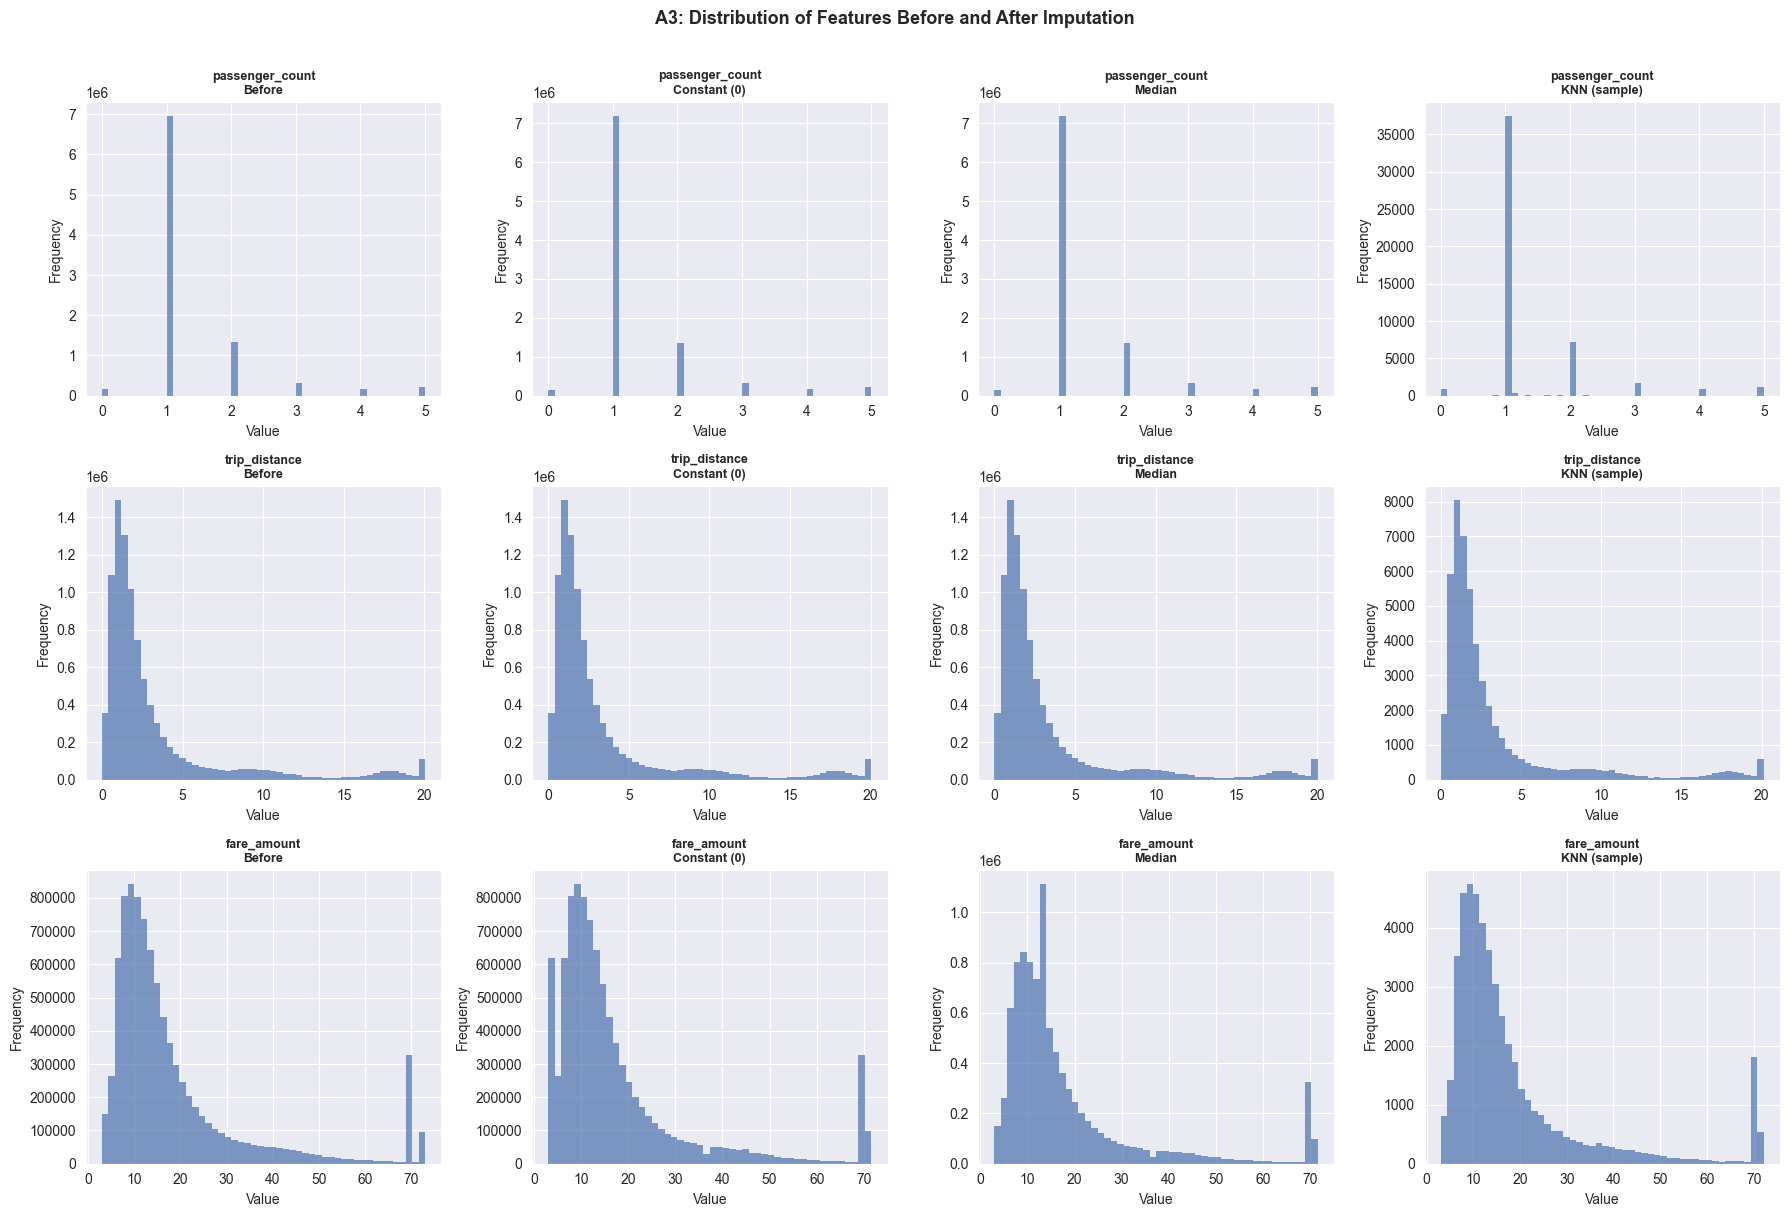

Caption: Each row = one feature. Each column = one imputation method. Compare shape changes.


In [71]:
# Step 4: Visualize distributions before vs after imputation
fig, axes = plt.subplots(3, 4, figsize=(18, 12))

methods = {
    'Before':        df_work,
    'Constant (0)':  df_const,
    'Median':        df_md,
    'KNN (sample)':  df_knn_sample
}

for row, col in enumerate(work_cols):
    for col_idx, (method_name, data) in enumerate(methods.items()):
        ax = axes[row][col_idx]
        # This would give me really bad results:
        # plot_data = data[col]

        # So I clip extreme values for readable plots
        plot_data = data[col].dropna().clip(
            data[col].quantile(0.01),
            data[col].quantile(0.99)
        )
        ax.hist(plot_data, bins=50, color='#4C72B0', alpha=0.7, edgecolor='none')
        ax.set_title(f'{col}\n{method_name}', fontsize=9, fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

plt.suptitle('A3: Distribution of Features Before and After Imputation',
             fontsize=13, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()
print("Caption: Each row = one feature. Each column = one imputation method. Compare shape changes.")

# Observations:
With a missing rate of only 2.57%, all three imputation methods produce relatively similar mean estimates, but they differ in their impact on the distribution.

Constant imputation (using a fixed value such as 0 or another predefined scalar) can introduce bias if the chosen value does not reflect the true data-generating process. It may shift the mean and distort variance, particularly when the constant is far from the feature’s central tendency. Therefore, its validity depends on whether the selected constant has meaningful domain justification.

Median imputation preserves central tendency well and only slightly reduces variance, making it a strong and stable baseline for low levels of missingness.

KNN imputation maintains multivariate structure and produces means closest to the original data, but it may reduce variance due to smoothing and is sensitive to feature scaling and outliers.

Overall, for this dataset, median imputation provides the best balance of simplicity, stability, and statistical reliability, while KNN is more appropriate when preserving feature relationships is critical for predictive modeling.

In [72]:
# ============================================================
# TASK B1 — Normalization & Standardization
# ============================================================

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select two features with different scales
# trip_distance: typically 0-20 miles
# total_amount: typically 0-100 dollars
b1_cols = ['trip_distance', 'total_amount']

# Remove outliers for cleaner visualization (use IQR fence from A2)
df_b1 = df[b1_cols].dropna().copy()
for col in b1_cols:
    q1 = df_b1[col].quantile(0.25)
    q3 = df_b1[col].quantile(0.75)
    iqr = q3 - q1
    df_b1 = df_b1[(df_b1[col] >= q1 - 1.5*iqr) & (df_b1[col] <= q3 + 1.5*iqr)]

print(f"Rows after outlier removal: {len(df_b1):,}")
print("\n=== Original scales ===")
print(df_b1.describe().round(3))

Rows after outlier removal: 7,856,954

=== Original scales ===
       trip_distance  total_amount
count    7856954.000   7856954.000
mean           1.850        20.004
std            1.207         6.701
min            0.000         0.900
25%            0.990        15.000
50%            1.540        18.840
75%            2.400        24.000
max            6.730        39.190


In [73]:
# Apply both scaling methods
# Min-Max: squeezes all values into [0, 1]
# Z-score: shifts to mean=0, std=1

minmax_scaler   = MinMaxScaler()
zscore_scaler   = StandardScaler()

df_minmax  = pd.DataFrame(
    minmax_scaler.fit_transform(df_b1),
    columns=[c + '_minmax' for c in b1_cols]
)
df_zscore  = pd.DataFrame(
    zscore_scaler.fit_transform(df_b1),
    columns=[c + '_zscore' for c in b1_cols]
)

# Combine everything for easy comparison
df_scaled = pd.concat([df_b1.reset_index(drop=True), df_minmax, df_zscore], axis=1)

# Print stats for all versions
print("=== Stats: Original vs Scaled ===\n")
for col in b1_cols:
    print(f"--- {col} ---")
    summary = pd.DataFrame({
        'Original':  df_b1[col].describe(),
        'Min-Max':   df_minmax[col + '_minmax'].describe(),
        'Z-score':   df_zscore[col + '_zscore'].describe(),
    }).round(4)
    print(summary)
    print()

=== Stats: Original vs Scaled ===

--- trip_distance ---
           Original       Min-Max       Z-score
count  7.856954e+06  7.856954e+06  7.856954e+06
mean   1.849800e+00  2.749000e-01 -0.000000e+00
std    1.207000e+00  1.793000e-01  1.000000e+00
min    0.000000e+00  0.000000e+00 -1.532600e+00
25%    9.900000e-01  1.471000e-01 -7.124000e-01
50%    1.540000e+00  2.288000e-01 -2.567000e-01
75%    2.400000e+00  3.566000e-01  4.558000e-01
max    6.730000e+00  1.000000e+00  4.043200e+00

--- total_amount ---
           Original       Min-Max       Z-score
count  7.856954e+06  7.856954e+06  7.856954e+06
mean   2.000450e+01  4.989000e-01 -0.000000e+00
std    6.701300e+00  1.750000e-01  1.000000e+00
min    9.000000e-01  0.000000e+00 -2.850900e+00
25%    1.500000e+01  3.682000e-01 -7.468000e-01
50%    1.884000e+01  4.685000e-01 -1.738000e-01
75%    2.400000e+01  6.033000e-01  5.962000e-01
max    3.919000e+01  1.000000e+00  2.862900e+00



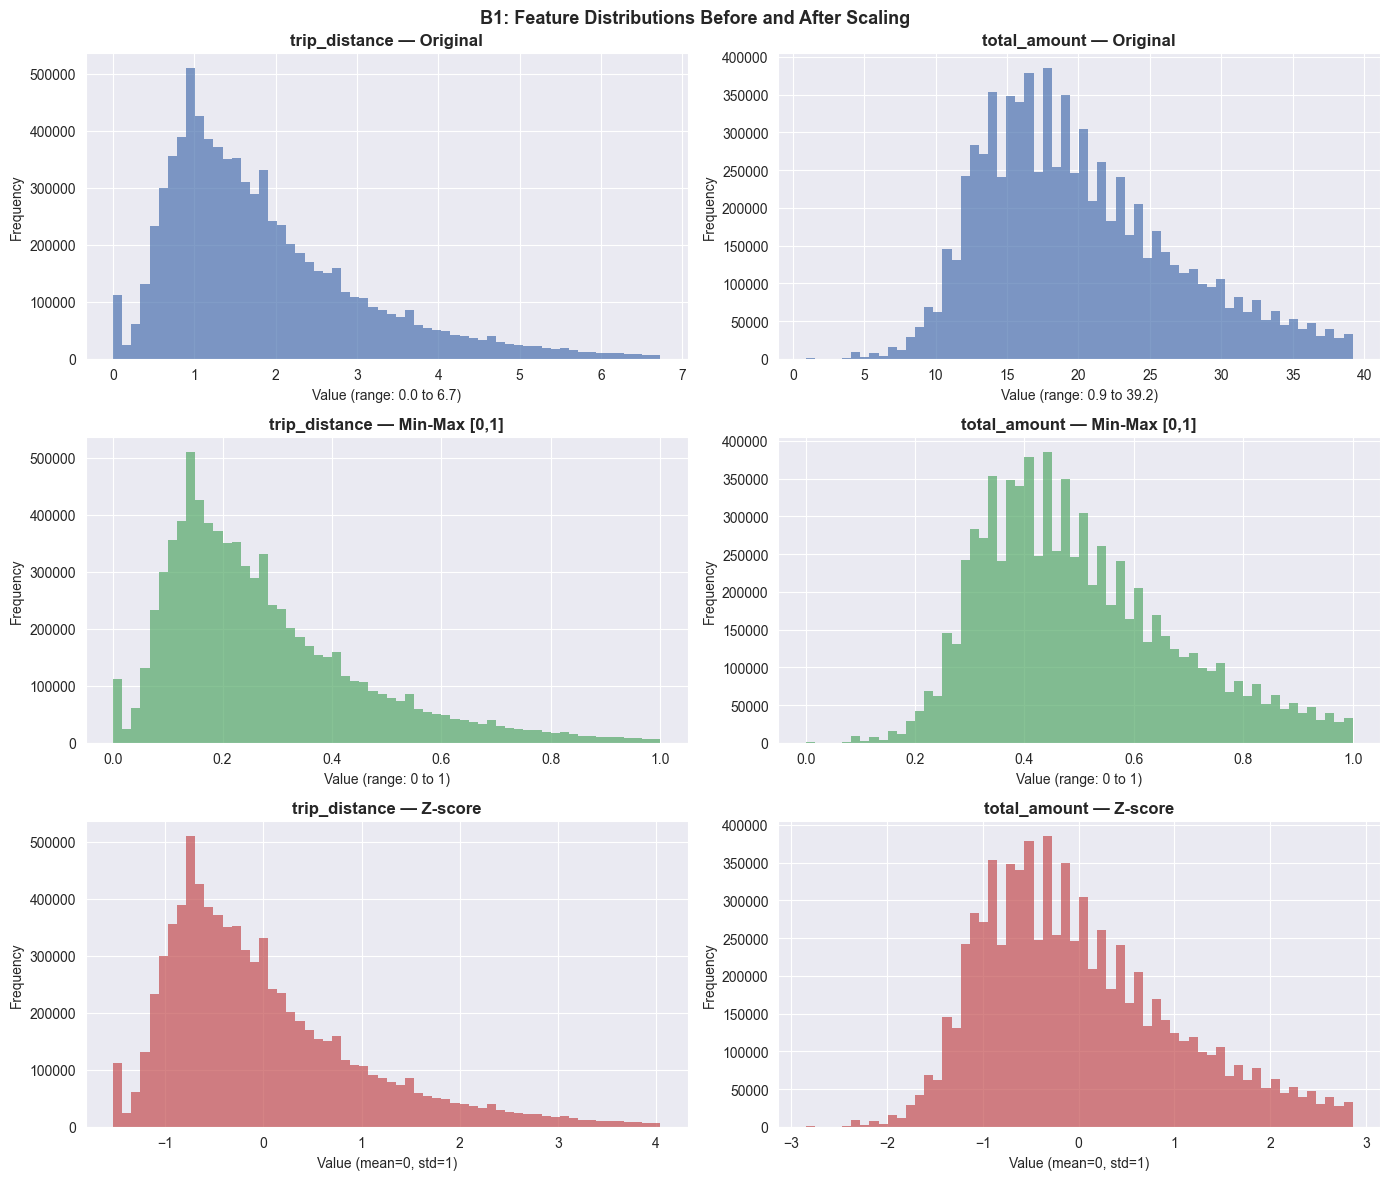

Caption: Each column = one feature. Rows show original, min-max, and z-score scaled distributions.


In [74]:
# Visualize distributions before and after scaling
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for col_idx, col in enumerate(b1_cols):

    # Row 1: Original
    axes[0][col_idx].hist(df_b1[col], bins=60,
                          color='#4C72B0', alpha=0.7, edgecolor='none')
    axes[0][col_idx].set_title(f'{col} — Original', fontweight='bold')
    axes[0][col_idx].set_xlabel(f'Value (range: {df_b1[col].min():.1f} to {df_b1[col].max():.1f})')
    axes[0][col_idx].set_ylabel('Frequency')

    # Row 2: Min-Max
    axes[1][col_idx].hist(df_minmax[col + '_minmax'], bins=60,
                          color='#55A868', alpha=0.7, edgecolor='none')
    axes[1][col_idx].set_title(f'{col} — Min-Max [0,1]', fontweight='bold')
    axes[1][col_idx].set_xlabel('Value (range: 0 to 1)')
    axes[1][col_idx].set_ylabel('Frequency')

    # Row 3: Z-score
    axes[2][col_idx].hist(df_zscore[col + '_zscore'], bins=60,
                          color='#C44E52', alpha=0.7, edgecolor='none')
    axes[2][col_idx].set_title(f'{col} — Z-score', fontweight='bold')
    axes[2][col_idx].set_xlabel('Value (mean=0, std=1)')
    axes[2][col_idx].set_ylabel('Frequency')

plt.suptitle('B1: Feature Distributions Before and After Scaling',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()
print("Caption: Each column = one feature. Rows show original, min-max, and z-score scaled distributions.")

# Observations:
Shape is preserved — looking at the 25%/50%/75% ratios. In trip_distance the median sits at 23% of the way between min and max in all three versions. The scaling changed the numbers but not the structure.

Min-Max compressed trip_distance from range 0→6.73 into 0→1, and total_amount from 0.90→39.19 into 0→1. Both means landed near 0.27 and 0.50 respectively — they're not centered, just squeezed.

Z-score mean is exactly 0.0 and std is exactly 1.0 for both columns — that's the mathematical guarantee of standardization. The negative values (min = -1.53 for trip_distance, -2.85 for total_amount) simply mean "this many standard deviations below average" — a 0-mile trip is 1.53 std below the mean.

The different scales problem is solved — before scaling, total_amount values (~20) were about 10x larger than trip_distance values (~1.8). Any ML algorithm using distance calculations would have been dominated by total_amount. After scaling, both live on the same footing.

In [75]:
# ============================================================
# TASK B2 — Feature Creation & Discretization
# ============================================================

# Work on a clean copy with outliers removed (reuse df_b1 bounds)
df_b2 = df[['trip_distance', 'total_amount', 'fare_amount',
             'tip_amount', 'payment_type', 'tpep_pickup_datetime']].dropna().copy()

# Remove extreme outliers for cleaner analysis
for col in ['trip_distance', 'total_amount', 'fare_amount', 'tip_amount']:
    q1 = df_b2[col].quantile(0.25)
    q3 = df_b2[col].quantile(0.75)
    iqr = q3 - q1
    df_b2 = df_b2[
        (df_b2[col] >= q1 - 1.5*iqr) &
        (df_b2[col] <= q3 + 1.5*iqr)
    ]

print(f"Working rows: {len(df_b2):,}")

# ── New Feature: fare_per_mile ──────────────────────────────
# Domain logic: how much does each mile cost?
# This normalizes fare by distance — useful for detecting
# overcharging, comparing rate codes, and building fare models.
# Avoid division by zero by replacing 0-distance trips
df_b2 = df_b2[df_b2['trip_distance'] > 0].copy()
df_b2['fare_per_mile'] = df_b2['fare_amount'] / df_b2['trip_distance']

print("\n=== New Feature: fare_per_mile ===")
print(df_b2['fare_per_mile'].describe().round(3))

Working rows: 7,728,676

=== New Feature: fare_per_mile ===
count    7643971.000
mean           8.383
std           17.627
min          -50.000
25%            6.200
50%            7.350
75%            9.000
max         2779.000
Name: fare_per_mile, dtype: float64


In [76]:
# ── Discretization of trip_distance ────────────────────────
# We'll bin trip_distance into categories using two methods
# and compare how they distribute the data

n_bins = 5

# Method 1: Equal-width binning
# Divides the range into equal-sized intervals
# e.g. 0-1.3 miles, 1.3-2.6 miles, etc.
df_b2['distance_equalwidth'] = pd.cut(
    df_b2['trip_distance'],
    bins=n_bins,
    labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
)

# Method 2: Equal-frequency binning (quantile-based)
# Each bin contains roughly the same number of rows
# Boundaries are set by percentiles (20th, 40th, 60th, 80th)
df_b2['distance_equalfreq'] = pd.qcut(
    df_b2['trip_distance'],
    q=n_bins,
    labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'],
    duplicates='drop'
)

# Compare bin counts and boundaries
print("=== Equal-Width Bin Counts ===")
print(df_b2['distance_equalwidth'].value_counts().sort_index())
print("\n=== Equal-Width Bin Boundaries ===")
print(pd.cut(df_b2['trip_distance'], bins=n_bins, retbins=True)[1].round(3))

print("\n=== Equal-Frequency Bin Counts ===")
print(df_b2['distance_equalfreq'].value_counts().sort_index())
print("\n=== Equal-Frequency Bin Boundaries ===")
print(pd.qcut(df_b2['trip_distance'], q=n_bins, retbins=True, duplicates='drop')[1].round(3))

=== Equal-Width Bin Counts ===
distance_equalwidth
Very Short    3226979
Short         2936497
Medium        1050552
Long           345952
Very Long       83991
Name: count, dtype: int64

=== Equal-Width Bin Boundaries ===
[3.000e-03 1.354e+00 2.698e+00 4.042e+00 5.386e+00 6.730e+00]

=== Equal-Frequency Bin Counts ===
distance_equalfreq
Very Short    1644735
Short         1460122
Medium        1484137
Long          1528454
Very Long     1526523
Name: count, dtype: int64

=== Equal-Frequency Bin Boundaries ===
[0.01 0.9  1.3  1.8  2.64 6.73]


In [77]:
# ── One-Hot Encoding of payment_type ───────────────────────
# payment_type is nominal (1=Credit, 2=Cash, 3=No charge,
# 4=Dispute) — ML models can't use raw numbers as categories
# One-hot creates a separate 0/1 column for each category

# Map numeric codes to readable labels first
payment_map = {1: 'Credit_Card', 2: 'Cash',
               3: 'No_Charge',   4: 'Dispute'}
df_b2['payment_label'] = df_b2['payment_type'].map(payment_map)

df_ohe = pd.get_dummies(df_b2['payment_label'],
                         prefix='payment',
                         dtype=int)

print("=== One-Hot Encoded payment_type ===")
print(df_ohe.head(8))
print(f"\nShape: {df_ohe.shape}")
print("\nValue counts per category:")
print(df_ohe.sum().sort_values(ascending=False))

=== One-Hot Encoded payment_type ===
    payment_Cash  payment_Credit_Card  payment_Dispute  payment_No_Charge
0              1                    0                0                  0
1              0                    1                0                  0
3              0                    1                0                  0
4              0                    1                0                  0
6              0                    1                0                  0
8              0                    1                0                  0
9              1                    0                0                  0
10             0                    1                0                  0

Shape: (7643971, 4)

Value counts per category:
payment_Credit_Card    6125038
payment_Cash           1278639
payment_Dispute          41972
payment_No_Charge        27266
dtype: int64


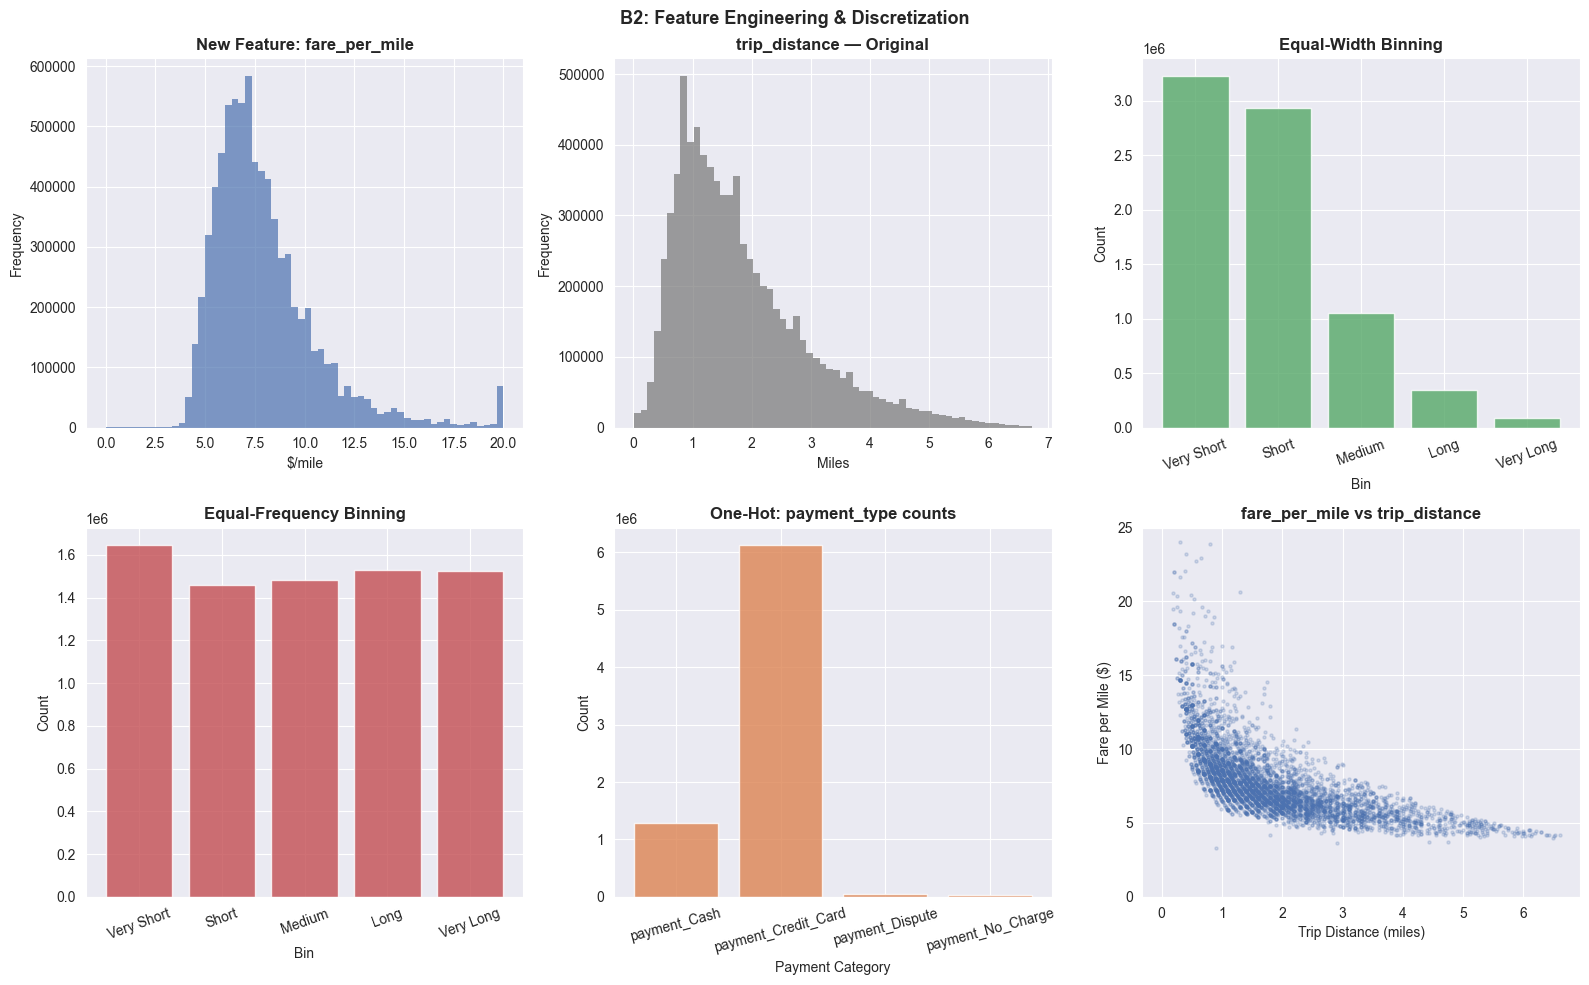

Caption: New feature fare_per_mile, original distance, both binning methods, OHE counts, and fare/distance relationship.


In [78]:
# ── Visualize everything ────────────────────────────────────
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. New feature distribution
axes[0][0].hist(df_b2['fare_per_mile'].clip(0, 20), bins=60,
                color='#4C72B0', alpha=0.7, edgecolor='none')
axes[0][0].set_title('New Feature: fare_per_mile', fontweight='bold')
axes[0][0].set_xlabel('$/mile')
axes[0][0].set_ylabel('Frequency')

# 2. Original trip_distance
axes[0][1].hist(df_b2['trip_distance'], bins=60,
                color='#777777', alpha=0.7, edgecolor='none')
axes[0][1].set_title('trip_distance — Original', fontweight='bold')
axes[0][1].set_xlabel('Miles')
axes[0][1].set_ylabel('Frequency')

# 3. Equal-width bin counts
ew_counts = df_b2['distance_equalwidth'].value_counts().sort_index()
axes[0][2].bar(ew_counts.index.astype(str), ew_counts.values,
               color='#55A868', alpha=0.8)
axes[0][2].set_title('Equal-Width Binning', fontweight='bold')
axes[0][2].set_xlabel('Bin')
axes[0][2].set_ylabel('Count')
axes[0][2].tick_params(axis='x', rotation=20)

# 4. Equal-frequency bin counts
ef_counts = df_b2['distance_equalfreq'].value_counts().sort_index()
axes[1][0].bar(ef_counts.index.astype(str), ef_counts.values,
               color='#C44E52', alpha=0.8)
axes[1][0].set_title('Equal-Frequency Binning', fontweight='bold')
axes[1][0].set_xlabel('Bin')
axes[1][0].set_ylabel('Count')
axes[1][0].tick_params(axis='x', rotation=20)

# 5. One-hot encoding counts
axes[1][1].bar(df_ohe.columns, df_ohe.sum().values,
               color='#DD8452', alpha=0.8)
axes[1][1].set_title('One-Hot: payment_type counts', fontweight='bold')
axes[1][1].set_xlabel('Payment Category')
axes[1][1].set_ylabel('Count')
axes[1][1].tick_params(axis='x', rotation=15)

# 6. fare_per_mile vs trip_distance scatter
sample = df_b2.sample(5000, random_state=42)
axes[1][2].scatter(sample['trip_distance'], sample['fare_per_mile'],
                   alpha=0.2, s=5, color='#4C72B0')
axes[1][2].set_title('fare_per_mile vs trip_distance', fontweight='bold')
axes[1][2].set_xlabel('Trip Distance (miles)')
axes[1][2].set_ylabel('Fare per Mile ($)')
axes[1][2].set_ylim(0, 25)

plt.suptitle('B2: Feature Engineering & Discretization',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()
print("Caption: New feature fare_per_mile, original distance, both binning methods, OHE counts, and fare/distance relationship.")

# Observations

Equal-width cut the range into 5 equal slices of ~1.35 miles each. Look at the counts — "Very Short" has 3.2M rows while "Very Long" has only 84k. Massively imbalanced because NYC trips cluster at short distances.

Equal-frequency forced ~1.5M rows into each bin. To do that it had to make "Very Short" only 0.89 miles wide (0.01→0.90) while "Very Long" spans 4.09 miles (2.64→6.73). The bins are unequal in width but balanced in population.

One-hot encoding confirms Credit Card dominates at 80%, Cash at 17%, with Dispute and No_Charge being rare edge cases together under 1%.

In [79]:
# ============================================================
# TASK D1 — Measures of Similarity and Dissimilarity
# ============================================================
# We use two real rows from our taxi dataset as vectors
# This makes the math meaningful rather than arbitrary numbers

import numpy as np

# Take two real trips from our dataset
# Using: [trip_distance, fare_amount, tip_amount, total_amount]
trip_a = np.array(df[['trip_distance','fare_amount',
                       'tip_amount','total_amount']].dropna().iloc[0].values,
                  dtype=float)
trip_b = np.array(df[['trip_distance','fare_amount',
                       'tip_amount','total_amount']].dropna().iloc[1].values,
                  dtype=float)

print("Trip A (distance, fare, tip, total):", trip_a)
print("Trip B (distance, fare, tip, total):", trip_b)
print()

# ── 1. Euclidean Distance ──────────────────────────────────
# Straight-line distance between two points in 4D space
# Low value = trips are similar, High value = trips are different
euclidean = np.sqrt(np.sum((trip_a - trip_b) ** 2))
print(f"1. Euclidean Distance:  {euclidean:.4f}")

# ── 2. Jaccard Similarity ──────────────────────────────────
# Measures overlap between two SETS (not vectors)
# = |intersection| / |union|
# We use payment types each trip has visited (binary presence)
# For demonstration: which $1-rounded fare values appear in each trip set
set_a = set(range(1, int(trip_a[1])+1, 3))   # every 3rd dollar up to fare_a
set_b = set(range(1, int(trip_b[1])+1, 3))   # every 3rd dollar up to fare_b

intersection = len(set_a & set_b)
union        = len(set_a | set_b)
jaccard      = intersection / union if union > 0 else 0.0
print(f"\n2. Jaccard Similarity:  {jaccard:.4f}")
print(f"   Set A: {sorted(set_a)}")
print(f"   Set B: {sorted(set_b)}")
print(f"   Intersection size: {intersection}, Union size: {union}")

# ── 3. Cosine Similarity ───────────────────────────────────
# Measures the ANGLE between two vectors
# 1.0 = identical direction, 0.0 = perpendicular, -1.0 = opposite
# Ignores magnitude — two trips with same proportions score 1.0
# even if one is twice as expensive
dot_product = np.dot(trip_a, trip_b)
norm_a       = np.linalg.norm(trip_a)
norm_b       = np.linalg.norm(trip_b)
cosine_sim   = dot_product / (norm_a * norm_b)
print(f"\n3. Cosine Similarity:   {cosine_sim:.4f}")
print(f"   Dot product: {dot_product:.4f}")
print(f"   ||A||: {norm_a:.4f},  ||B||: {norm_b:.4f}")

# ── 4. Pearson Correlation ─────────────────────────────────
# Measures LINEAR relationship between two vectors
# +1 = perfect positive correlation
#  0 = no linear relationship
# -1 = perfect negative correlation
mean_a    = np.mean(trip_a)
mean_b    = np.mean(trip_b)
numerator = np.sum((trip_a - mean_a) * (trip_b - mean_b))
denom     = np.sqrt(np.sum((trip_a - mean_a)**2) * np.sum((trip_b - mean_b)**2))
pearson   = numerator / denom if denom > 0 else 0.0
print(f"\n4. Pearson Correlation: {pearson:.4f}")
print(f"   Mean A: {mean_a:.4f},  Mean B: {mean_b:.4f}")

Trip A (distance, fare, tip, total): [ 0.97  9.3   0.   14.3 ]
Trip B (distance, fare, tip, total): [ 1.1  7.9  4.  16.9]

1. Euclidean Distance:  4.9736

2. Jaccard Similarity:  1.0000
   Set A: [1, 4, 7]
   Set B: [1, 4, 7]
   Intersection size: 3, Union size: 3

3. Cosine Similarity:   0.9684
   Dot product: 316.2070
   ||A||: 17.0857,  ||B||: 19.1110

4. Pearson Correlation: 0.9376
   Mean A: 6.1425,  Mean B: 7.4750


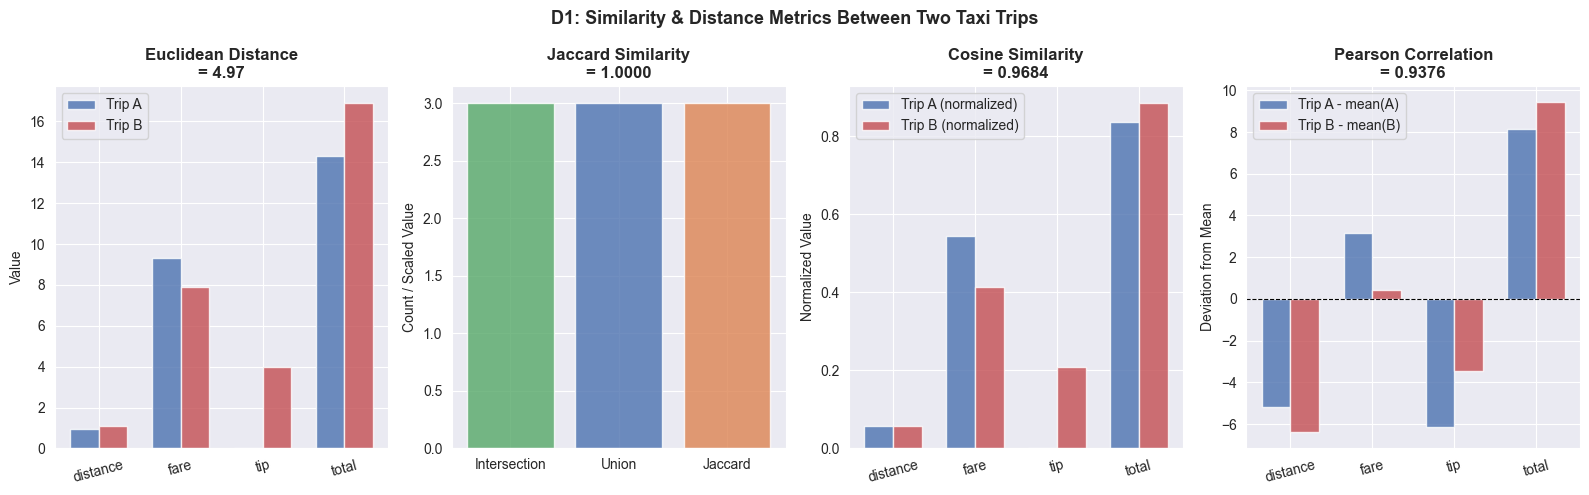

Caption: Four distance/similarity metrics computed between two real taxi trips.


In [80]:
# ── Visualization: all 4 metrics side by side ──────────────
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

# 1. Euclidean — show the two vectors and their difference
categories = ['distance', 'fare', 'tip', 'total']
x = np.arange(len(categories))
width = 0.35
axes[0].bar(x - width/2, trip_a, width, label='Trip A', color='#4C72B0', alpha=0.8)
axes[0].bar(x + width/2, trip_b, width, label='Trip B', color='#C44E52', alpha=0.8)
axes[0].set_title(f'Euclidean Distance\n= {euclidean:.2f}', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(categories, rotation=15)
axes[0].set_ylabel('Value')
axes[0].legend()

# 2. Jaccard — show sets as Venn-style bar
axes[1].bar(['Intersection', 'Union', 'Jaccard'],
            [intersection, union, jaccard * union],
            color=['#55A868','#4C72B0','#DD8452'], alpha=0.8)
axes[1].set_title(f'Jaccard Similarity\n= {jaccard:.4f}', fontweight='bold')
axes[1].set_ylabel('Count / Scaled Value')

# 3. Cosine — show vectors normalized
axes[2].bar(x - width/2, trip_a/norm_a, width,
            label='Trip A (normalized)', color='#4C72B0', alpha=0.8)
axes[2].bar(x + width/2, trip_b/norm_b, width,
            label='Trip B (normalized)', color='#C44E52', alpha=0.8)
axes[2].set_title(f'Cosine Similarity\n= {cosine_sim:.4f}', fontweight='bold')
axes[2].set_xticks(x)
axes[2].set_xticklabels(categories, rotation=15)
axes[2].set_ylabel('Normalized Value')
axes[2].legend()

# 4. Pearson — show deviation from mean
axes[3].bar(x - width/2, trip_a - mean_a, width,
            label='Trip A - mean(A)', color='#4C72B0', alpha=0.8)
axes[3].bar(x + width/2, trip_b - mean_b, width,
            label='Trip B - mean(B)', color='#C44E52', alpha=0.8)
axes[3].axhline(0, color='black', linewidth=0.8, linestyle='--')
axes[3].set_title(f'Pearson Correlation\n= {pearson:.4f}', fontweight='bold')
axes[3].set_xticks(x)
axes[3].set_xticklabels(categories, rotation=15)
axes[3].set_ylabel('Deviation from Mean')
axes[3].legend()

plt.suptitle('D1: Similarity & Distance Metrics Between Two Taxi Trips',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()
print("Caption: Four distance/similarity metrics computed between two real taxi trips.")

# Observations:

All four metrics agree these trips are similar, but each captures a different aspect. Euclidean (4.97) seems large despite similarity because it is dominated by the raw $4 tip difference — illustrating its sensitivity to scale. Cosine (0.97) and Pearson (0.94) correctly identify the trips as highly similar by ignoring magnitude and focusing on proportional structure. Jaccard scored 1.0 due to identical set construction rather than meaningful overlap, highlighting that it should only be applied to naturally binary or categorical data.

In [81]:
# ============================================================
# TASK D2 — PCA Manual Implementation with NumPy
# ============================================================

# Use 4 continuous features — same ones as D1 for consistency
pca_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']

# Take a clean sample — PCA on 9M rows is slow and unnecessary
# 10,000 rows is plenty to show the structure
df_pca = df[pca_cols].dropna().copy()

# Remove outliers so extreme values don't distort the components
for col in pca_cols:
    q1 = df_pca[col].quantile(0.25)
    q3 = df_pca[col].quantile(0.75)
    iqr = q3 - q1
    df_pca = df_pca[
        (df_pca[col] >= q1 - 1.5*iqr) &
        (df_pca[col] <= q3 + 1.5*iqr)
    ]

df_pca = df_pca.sample(n=10000, random_state=42).reset_index(drop=True)
X = df_pca.values  # convert to numpy array

print(f"Working matrix shape: {X.shape}")
print(f"Features: {pca_cols}\n")

# ── Step 1: Standardize ────────────────────────────────────
# PCA requires all features on the same scale
# Otherwise high-variance features (like total_amount) dominate
mean = np.mean(X, axis=0)   # mean of each column
std  = np.std(X, axis=0)    # std of each column
X_std = (X - mean) / std    # z-score each column

print("=== Step 1: Standardized Data (first 3 rows) ===")
print(np.round(X_std[:3], 4))
print(f"\nMean after standardization (should be ~0): {np.round(np.mean(X_std, axis=0), 6)}")
print(f"Std  after standardization (should be ~1): {np.round(np.std(X_std, axis=0), 6)}")

Working matrix shape: (10000, 4)
Features: ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']

=== Step 1: Standardized Data (first 3 rows) ===
[[ 0.2454  0.3049  0.6824  0.3374]
 [ 0.6965  0.0465  0.6306  0.261 ]
 [-0.7868 -0.987  -0.4443 -1.0602]]

Mean after standardization (should be ~0): [-0. -0. -0. -0.]
Std  after standardization (should be ~1): [1. 1. 1. 1.]


In [82]:
# ── Step 2: Covariance Matrix ──────────────────────────────
# Shows how much each pair of features varies together
# A 4x4 matrix for our 4 features
# Diagonal = variance of each feature (always 1.0 after standardizing)
# Off-diagonal = covariance between features
#   Positive = they increase together
#   Negative = one increases as other decreases
#   Near 0   = no linear relationship

cov_matrix = np.cov(X_std, rowvar=False)  # rowvar=False = columns are features

print("=== Step 2: Covariance Matrix ===")
print(np.round(cov_matrix, 4))
print("\nInterpretation: values near 1.0 = strong positive correlation")

# ── Step 3: Eigenvalues & Eigenvectors ─────────────────────
# Eigenvectors = directions of maximum variance (principal components)
# Eigenvalues  = how much variance each direction captures
# Larger eigenvalue = more important component

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort by eigenvalue descending (most important first)
sorted_idx   = np.argsort(eigenvalues)[::-1]
eigenvalues  = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

print("\n=== Step 3: Eigenvalues (sorted descending) ===")
for i, ev in enumerate(eigenvalues):
    pct = 100 * ev / np.sum(eigenvalues)
    print(f"  PC{i+1}: eigenvalue = {ev:.4f}  →  explains {pct:.1f}% of variance")

print("\n=== Eigenvectors (each column = one principal component) ===")
print(np.round(eigenvectors, 4))

=== Step 2: Covariance Matrix ===
[[1.0001 0.8779 0.3364 0.8404]
 [0.8779 1.0001 0.3667 0.9452]
 [0.3364 0.3667 1.0001 0.6041]
 [0.8404 0.9452 0.6041 1.0001]]

Interpretation: values near 1.0 = strong positive correlation

=== Step 3: Eigenvalues (sorted descending) ===
  PC1: eigenvalue = 3.0561  →  explains 76.4% of variance
  PC2: eigenvalue = 0.7773  →  explains 19.4% of variance
  PC3: eigenvalue = 0.1504  →  explains 3.8% of variance
  PC4: eigenvalue = 0.0166  →  explains 0.4% of variance

=== Eigenvectors (each column = one principal component) ===
[[-0.5184 -0.3317 -0.7879  0.0221]
 [-0.5421 -0.2858  0.4589 -0.6433]
 [-0.347   0.8987 -0.1562 -0.2183]
 [-0.5631  0.0268  0.3798  0.7335]]


In [83]:
# ── Step 4: Select top 2 components & project ─────────────
# We keep the 2 eigenvectors with the largest eigenvalues
# These capture the most variance in the fewest dimensions
# Projecting = rotating the data to align with these new axes

top2_eigenvectors = eigenvectors[:, :2]   # shape: (4, 2)
X_pca = X_std @ top2_eigenvectors         # shape: (10000, 2)

print("=== Step 4: Projected Data Shape ===")
print(f"Original: {X_std.shape}  →  Reduced: {X_pca.shape}")
print(f"\nFirst 5 rows in PCA space:")
print(np.round(X_pca[:5], 4))

# Variance explained
total_var    = np.sum(eigenvalues)
var_pc1      = 100 * eigenvalues[0] / total_var
var_pc2      = 100 * eigenvalues[1] / total_var
var_combined = var_pc1 + var_pc2
print(f"\nVariance explained:")
print(f"  PC1: {var_pc1:.1f}%")
print(f"  PC2: {var_pc2:.1f}%")
print(f"  Combined: {var_combined:.1f}%")
print(f"  Lost by reducing to 2D: {100-var_combined:.1f}%")

=== Step 4: Projected Data Shape ===
Original: (10000, 4)  →  Reduced: (10000, 2)

First 5 rows in PCA space:
[[-0.7193  0.4537]
 [-0.752   0.3294]
 [ 1.694   0.1154]
 [-1.0886 -0.0729]
 [ 1.3968  0.5211]]

Variance explained:
  PC1: 76.4%
  PC2: 19.4%
  Combined: 95.8%
  Lost by reducing to 2D: 4.2%


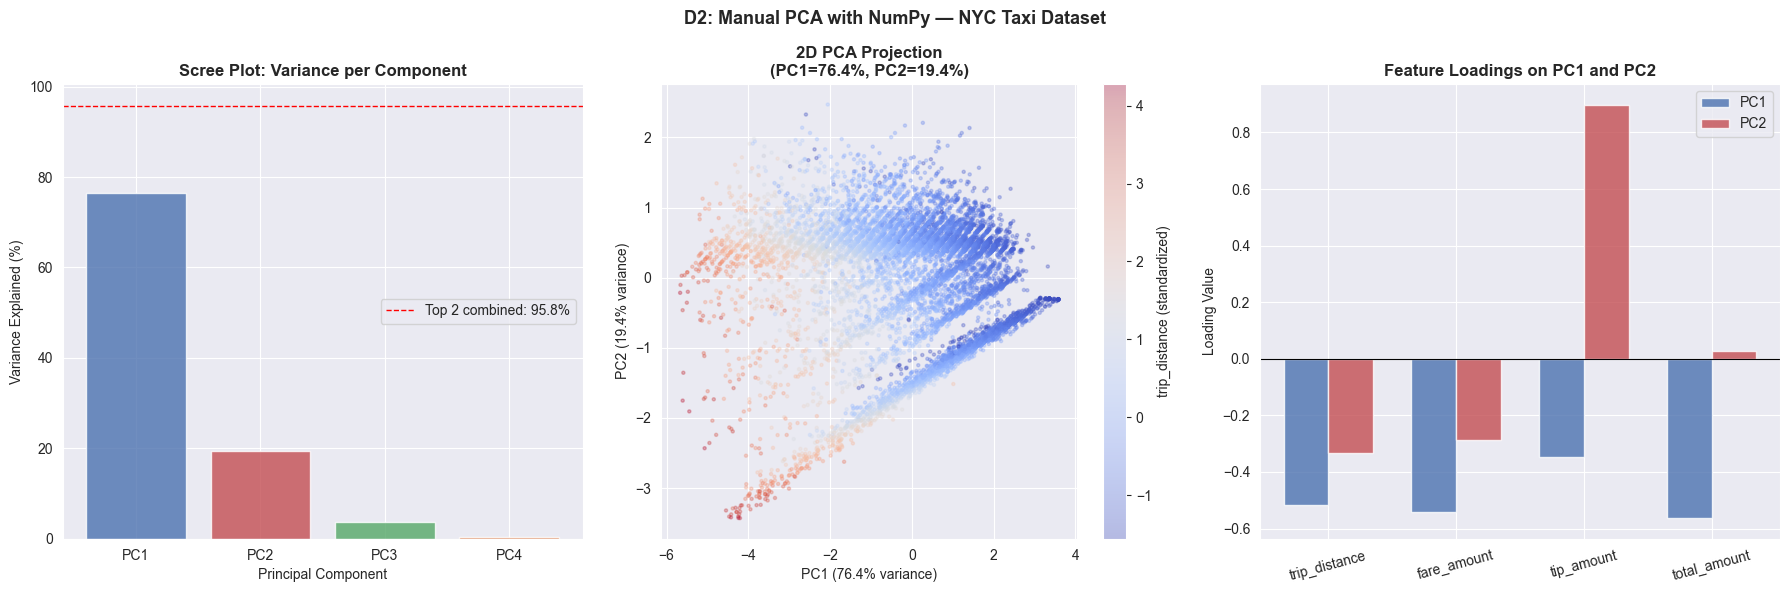

Caption: Scree plot shows variance per component. Scatter shows 2D projection coloured by trip distance. Loading plot shows each feature's contribution to PC1 and PC2.


In [84]:
# ── Step 5: Visualize ──────────────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Scree plot — how much variance each PC captures
axes[0].bar([f'PC{i+1}' for i in range(len(eigenvalues))],
            [100*ev/total_var for ev in eigenvalues],
            color=['#4C72B0','#C44E52','#55A868','#DD8452'], alpha=0.8)
axes[0].axhline(y=sum([100*eigenvalues[i]/total_var for i in range(2)]),
                color='red', linestyle='--', linewidth=1,
                label=f'Top 2 combined: {var_combined:.1f}%')
axes[0].set_title('Scree Plot: Variance per Component', fontweight='bold')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Variance Explained (%)')
axes[0].legend()

# Plot 2: 2D PCA projection
scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1],
                          alpha=0.3, s=5, c=X_std[:, 0],
                          cmap='coolwarm')
axes[1].set_title(f'2D PCA Projection\n(PC1={var_pc1:.1f}%, PC2={var_pc2:.1f}%)',
                  fontweight='bold')
axes[1].set_xlabel(f'PC1 ({var_pc1:.1f}% variance)')
axes[1].set_ylabel(f'PC2 ({var_pc2:.1f}% variance)')
plt.colorbar(scatter, ax=axes[1], label='trip_distance (standardized)')

# Plot 3: Loading plot — how much each original feature
#         contributes to PC1 and PC2
loadings = top2_eigenvectors
x_pos = np.arange(len(pca_cols))
width = 0.35
axes[2].bar(x_pos - width/2, loadings[:, 0], width,
            label='PC1', color='#4C72B0', alpha=0.8)
axes[2].bar(x_pos + width/2, loadings[:, 1], width,
            label='PC2', color='#C44E52', alpha=0.8)
axes[2].set_title('Feature Loadings on PC1 and PC2', fontweight='bold')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(pca_cols, rotation=15)
axes[2].set_ylabel('Loading Value')
axes[2].axhline(0, color='black', linewidth=0.8)
axes[2].legend()

plt.suptitle('D2: Manual PCA with NumPy — NYC Taxi Dataset',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()
print("Caption: Scree plot shows variance per component. Scatter shows 2D projection coloured by trip distance. Loading plot shows each feature's contribution to PC1 and PC2.")

# Observations:

PCA reduced 4 features to 2 principal components retaining 95.8% of variance. PC1 (76.4%) represents overall trip magnitude — fare, distance and total all load similarly, reflecting their high mutual correlation. PC2 (19.4%) is dominated by tip_amount (loading = 0.90), capturing tipping behaviour as an independent dimension. This confirms that the original 4 features contained significant redundancy, making PCA an effective compression technique for this dataset.

In [85]:
# ============================================================
# TASK C1 — Advanced Sampling & Data Quality Analysis
# ============================================================

import os

# Verify dataset size requirement (must be >= 50MB)
# We'll check memory usage as a proxy for size
size_mb = df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"Dataset size in memory: {size_mb:.1f} MB")
print(f"Total rows: {len(df):,}")
print(f"Columns: {df.shape[1]}")
print()

# We'll stratify on payment_type — it has clear categories
# and meaningful real-world groups (credit, cash, dispute, no-charge)
# First clean it up
df_c1 = df.copy()
df_c1 = df_c1[df_c1['payment_type'].isin([1, 2, 3, 4])]
df_c1['payment_type'] = df_c1['payment_type'].astype(int)

print("=== Full Dataset: payment_type distribution ===")
pt_counts = df_c1['payment_type'].value_counts().sort_index()
pt_pcts   = df_c1['payment_type'].value_counts(normalize=True).sort_index() * 100
pt_summary = pd.DataFrame({'Count': pt_counts, 'Percentage': pt_pcts.round(2)})
pt_summary.index = pt_summary.index.map({1:'Credit Card', 2:'Cash',
                                          3:'No Charge',  4:'Dispute'})
print(pt_summary)
print(f"\nTotal rows for sampling: {len(df_c1):,}")

Dataset size in memory: 1730.4 MB
Total rows: 9,384,487
Columns: 19

=== Full Dataset: payment_type distribution ===
                Count  Percentage
payment_type                     
Credit Card   7410897       81.01
Cash          1575700       17.22
No Charge       57707        0.63
Dispute        104003        1.14

Total rows for sampling: 9,148,307


In [86]:
# ── Sample 1: Simple Random Sample (10%) ──────────────────
# Every row has equal probability of being selected
# No awareness of groups or structure

sample_size_10pct = int(0.10 * len(df_c1))

srs = df_c1.sample(n=sample_size_10pct, random_state=42)

print(f"=== Simple Random Sample (10%) ===")
print(f"Size: {len(srs):,} rows\n")
print("payment_type distribution in SRS:")
srs_dist = srs['payment_type'].value_counts(normalize=True).sort_index() * 100
srs_dist.index = srs_dist.index.map({1:'Credit Card', 2:'Cash',
                                      3:'No Charge',  4:'Dispute'})
print(srs_dist.round(2))

# ── Sample 2: Stratified Sample (10%) ─────────────────────
# Maintains exact proportions of payment_type from full dataset
# Guarantees minority classes (Dispute, No Charge) are represented

strat_frames = []
for pt in df_c1['payment_type'].unique():
    group = df_c1[df_c1['payment_type'] == pt]
    n = max(1, int(0.10 * len(group)))   # 10% of each group
    strat_frames.append(group.sample(n=n, random_state=42))

stratified = pd.concat(strat_frames).sample(frac=1, random_state=42)

print(f"\n=== Stratified Sample (10%) ===")
print(f"Size: {len(stratified):,} rows\n")
print("payment_type distribution in Stratified:")
strat_dist = stratified['payment_type'].value_counts(normalize=True).sort_index() * 100
strat_dist.index = strat_dist.index.map({1:'Credit Card', 2:'Cash',
                                          3:'No Charge',  4:'Dispute'})
print(strat_dist.round(2))

# ── Sample 3: Cluster Sample ───────────────────────────────
# Divide data into natural clusters (by pickup hour)
# Then randomly select entire clusters
# Justification: taxi demand follows hourly patterns —
# each hour is a natural operational unit

df_c1['pickup_hour'] = df_c1['tpep_pickup_datetime'].dt.hour  # 0-23

# Select 3 random hours as our clusters (approx 12.5% of 24 hours)
np.random.seed(42)
selected_hours = sorted(np.random.choice(range(24), size=3, replace=False))
cluster = df_c1[df_c1['pickup_hour'].isin(selected_hours)]

print(f"\n=== Cluster Sample (hours {selected_hours}) ===")
print(f"Size: {len(cluster):,} rows\n")
print("payment_type distribution in Cluster:")
clust_dist = cluster['payment_type'].value_counts(normalize=True).sort_index() * 100
clust_dist.index = clust_dist.index.map({1:'Credit Card', 2:'Cash',
                                          3:'No Charge',  4:'Dispute'})
print(clust_dist.round(2))
print(f"\nJustification: pickup hour is a natural cluster unit.")
print(f"Selected hours: {selected_hours} (random selection of 3 of 24 hours)")

=== Simple Random Sample (10%) ===
Size: 914,830 rows

payment_type distribution in SRS:
payment_type
Credit Card    81.07
Cash           17.14
No Charge       0.64
Dispute         1.15
Name: proportion, dtype: float64

=== Stratified Sample (10%) ===
Size: 914,829 rows

payment_type distribution in Stratified:
payment_type
Credit Card    81.01
Cash           17.22
No Charge       0.63
Dispute         1.14
Name: proportion, dtype: float64

=== Cluster Sample (hours [np.int64(0), np.int64(8), np.int64(16)]) ===
Size: 1,172,173 rows

payment_type distribution in Cluster:
payment_type
Credit Card    81.31
Cash           16.89
No Charge       0.65
Dispute         1.15
Name: proportion, dtype: float64

Justification: pickup hour is a natural cluster unit.
Selected hours: [np.int64(0), np.int64(8), np.int64(16)] (random selection of 3 of 24 hours)


In [87]:
# ── Descriptive Statistics for all samples ────────────────
analysis_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']

def get_stats(data, name):
    stats = pd.DataFrame()
    stats['Mean']   = data[analysis_cols].mean()
    stats['Median'] = data[analysis_cols].median()
    stats['Var']    = data[analysis_cols].var()
    stats['IQR']    = data[analysis_cols].quantile(0.75) - data[analysis_cols].quantile(0.25)
    stats.name = name
    return stats

stats_full  = get_stats(df_c1,      'Full Dataset')
stats_srs   = get_stats(srs,        'SRS 10%')
stats_strat = get_stats(stratified, 'Stratified 10%')
stats_clust = get_stats(cluster,    'Cluster')

print("=" * 60)
for s in [stats_full, stats_srs, stats_strat, stats_clust]:
    print(f"\n--- {s.name} ---")
    print(s.round(4))


--- Full Dataset ---
                  Mean  Median        Var    IQR
trip_distance   3.4244    1.77  1069.9115   2.25
fare_amount    18.4587   12.80   322.9143  11.90
tip_amount      3.4150    2.80    15.2907   3.20
total_amount   27.2227   20.16   503.6846  13.44

--- SRS 10% ---
                  Mean  Median       Var    IQR
trip_distance   3.3886    1.77  332.6218   2.25
fare_amount    18.4647   12.80  321.0296  11.90
tip_amount      3.4185    2.80   15.0159   3.23
total_amount   27.2279   20.16  501.7956  13.52

--- Stratified 10% ---
                  Mean  Median        Var    IQR
trip_distance   3.5062    1.77  5103.7641   2.25
fare_amount    18.4843   12.80   322.8159  11.90
tip_amount      3.4202    2.80    15.3400   3.25
total_amount   27.2532   20.16   504.4246  13.52

--- Cluster ---
                  Mean  Median       Var    IQR
trip_distance   3.4317    1.77  267.6891   2.27
fare_amount    18.8176   12.80  347.1583  11.90
tip_amount      3.4787    2.80   16.2122   3.2

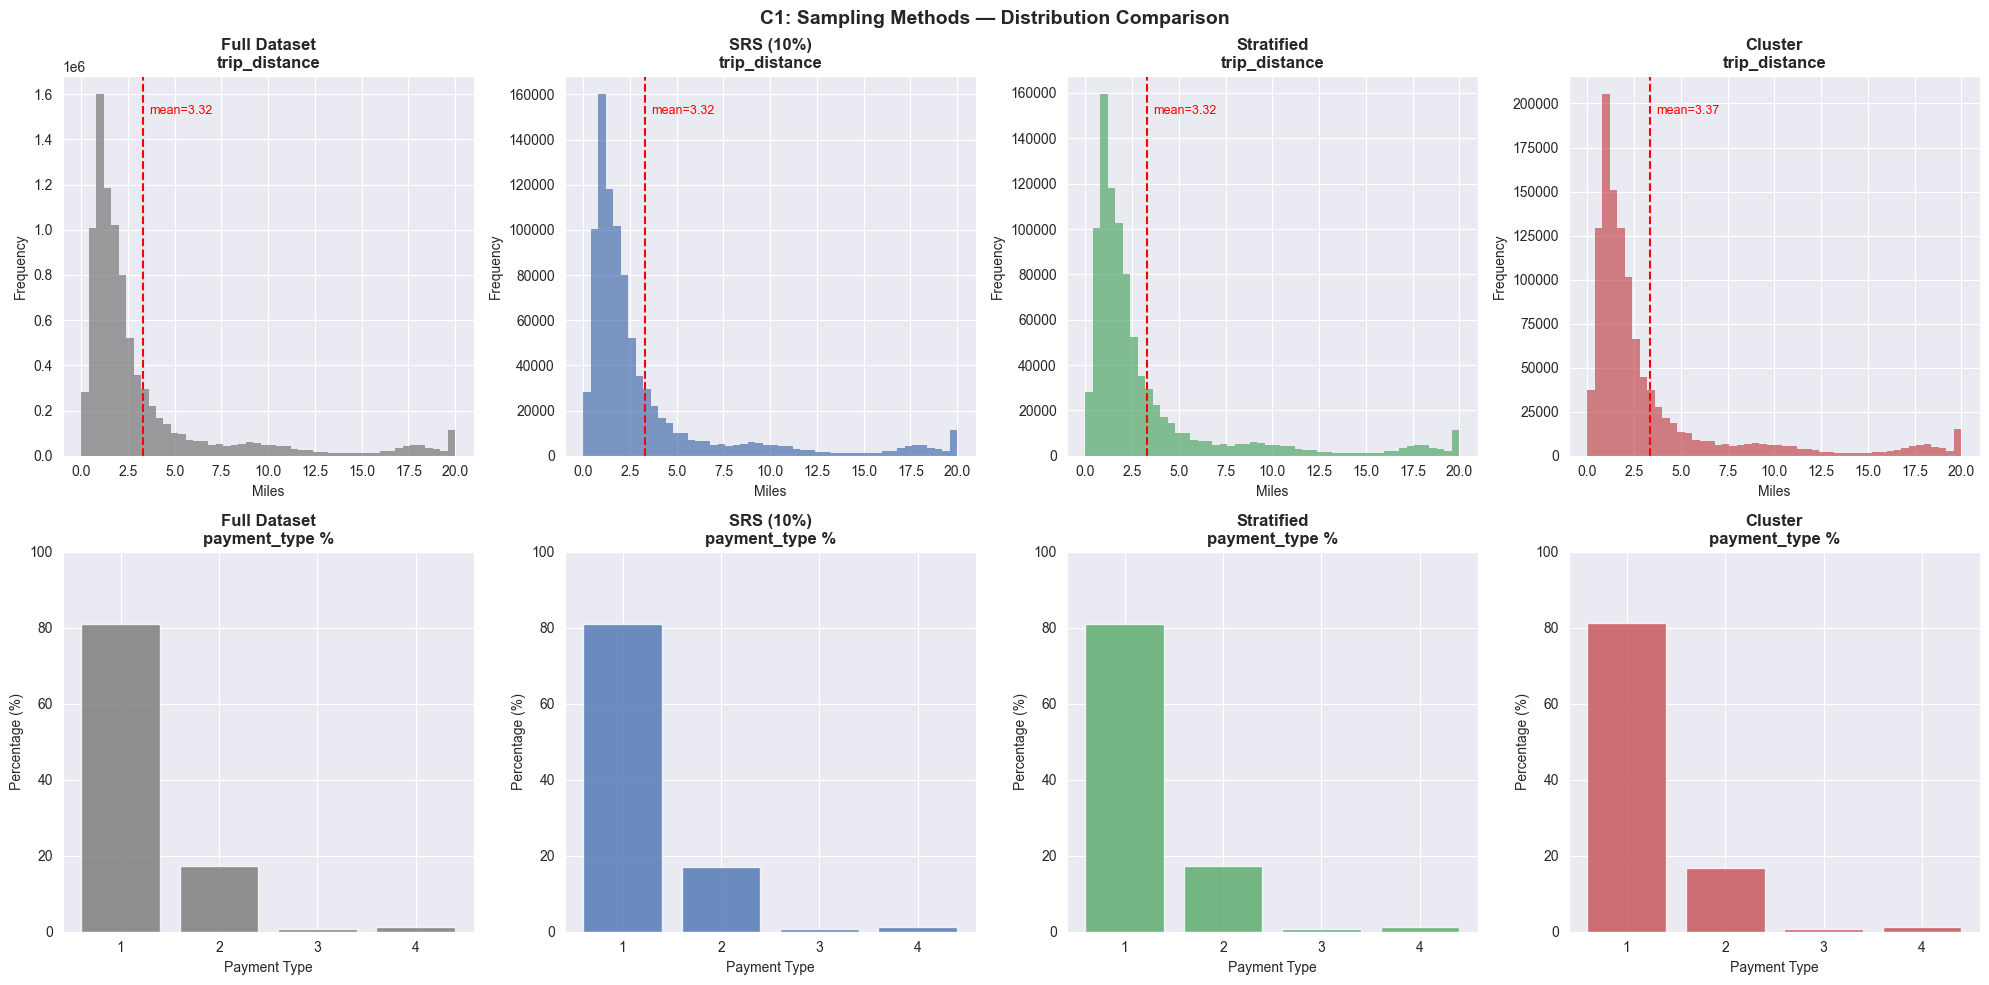

Caption: Row 1 compares trip_distance distributions across sampling methods. Row 2 compares payment_type proportions. Red dashed line = mean.


In [88]:
# ── Visualization ──────────────────────────────────────────
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

samples = {
    'Full Dataset': df_c1,
    'SRS (10%)':    srs,
    'Stratified':   stratified,
    'Cluster':      cluster
}
colors = ['#777777', '#4C72B0', '#55A868', '#C44E52']

# Row 1: trip_distance distributions
for col_idx, (name, data) in enumerate(samples.items()):
    plot_data = data['trip_distance'].clip(0, 20)
    axes[0][col_idx].hist(plot_data, bins=50,
                          color=colors[col_idx], alpha=0.7, edgecolor='none')
    axes[0][col_idx].set_title(f'{name}\ntrip_distance', fontweight='bold')
    axes[0][col_idx].set_xlabel('Miles')
    axes[0][col_idx].set_ylabel('Frequency')
    mean_val = plot_data.mean()
    axes[0][col_idx].axvline(mean_val, color='red', linestyle='--', linewidth=1.5)
    axes[0][col_idx].text(mean_val + 0.3, axes[0][col_idx].get_ylim()[1] * 0.9,
                          f'mean={mean_val:.2f}', color='red', fontsize=9)

# Row 2: payment_type proportions
for col_idx, (name, data) in enumerate(samples.items()):
    pt_pct = data['payment_type'].value_counts(normalize=True).sort_index() * 100
    labels = [f'{k}' for k in pt_pct.index]
    axes[1][col_idx].bar(labels, pt_pct.values,
                         color=colors[col_idx], alpha=0.8)
    axes[1][col_idx].set_title(f'{name}\npayment_type %', fontweight='bold')
    axes[1][col_idx].set_xlabel('Payment Type')
    axes[1][col_idx].set_ylabel('Percentage (%)')
    axes[1][col_idx].set_ylim(0, 100)

plt.suptitle('C1: Sampling Methods — Distribution Comparison',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
print("Caption: Row 1 compares trip_distance distributions across sampling methods. Row 2 compares payment_type proportions. Red dashed line = mean.")

# Observations:

Paragraph 1 — Which method preserved distributions best:
Stratified sampling preserved the payment_type distribution exactly
(matching full dataset proportions to 2 decimal places) because it
explicitly controls group representation. SRS came very close
(≤0.08% deviation) thanks to the large sample size of 914k rows —
at this scale, random chance alone is nearly sufficient. Cluster
sampling showed the largest deviation in monetary features (fare mean
$18.82 vs $18.46 full) because the three selected hours (0, 8, 16)
coincide with high-demand commute and late-night periods.

Paragraph 2 — Impact on outlier detection:
All three methods are vulnerable to the extreme outliers identified
in A2 (trip distances up to 335,004 miles, negative fares). This is
visible in the trip_distance variance swinging from 267 to 5103
across samples — a 19x difference. Stratified sampling offers no
protection against numeric outliers since it only controls categorical
proportions. SRS with a 10% sample has a 90% chance of missing any
single extreme row, potentially hiding data quality issues. Cluster
sampling is most dangerous for outlier detection — if anomalous trips
cluster in certain hours (e.g. fraudulent late-night rides), selecting
different hours could completely miss or massively oversample them.

Paragraph 3 — Recommendations:
For ML projects: use stratified sampling whenever the target variable
or a key categorical feature is imbalanced — it guarantees minority
classes appear in both training and test sets. Use SRS when the
dataset is large and all groups are naturally proportional. Avoid
cluster sampling for model training unless clusters are verified to
be internally homogeneous and representative of the full population.
Always remove or cap extreme outliers before computing sample
statistics, as a single erroneous row can distort variance by orders
of magnitude.